In [1]:
#| echo: false
#| warning: false

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from io import StringIO
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

%matplotlib inline
import matplotlib_inline.backend_inline
import pydot
from IPython.display import Image

sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

## 8.1 Regression Trees

Load `Hitters` data

In [2]:
df_hitters = pd.read_csv("../Data/Hitters.csv", index_col=0).dropna()

In [3]:
df_hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


Select variables of interest

In [4]:
X = df_hitters[['Years', 'Hits']].values.reshape(-1, 2)
y = np.log(df_hitters["Salary"].values.reshape(-1, 1))

Build histograms of the `salary` and `log(salary)` variables

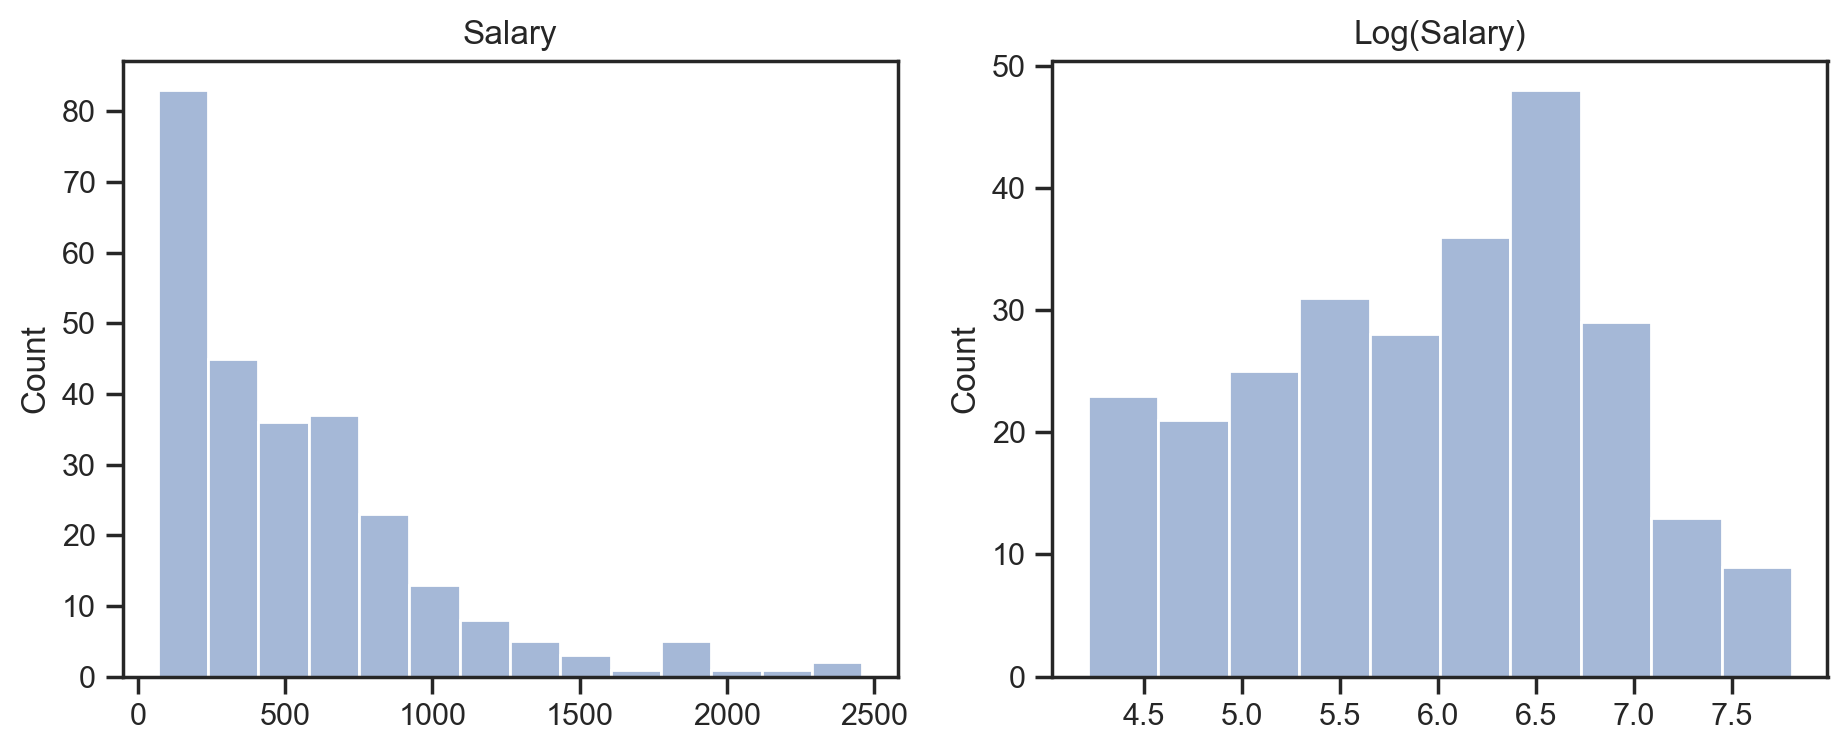

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,4))

sns.histplot(np.exp(y), ax=ax1)
sns.histplot(y, ax=ax2)
ax1.set_title("Salary")
ax2.set_title("Log(Salary)")
ax1.get_legend().remove()
ax2.get_legend().remove()
plt.show()

Estimate tree model

In [6]:
#| output: false
#| warning: false

tree_reg1 = DecisionTreeRegressor(max_leaf_nodes = 3, random_state = 1337)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=3, random_state=1337)

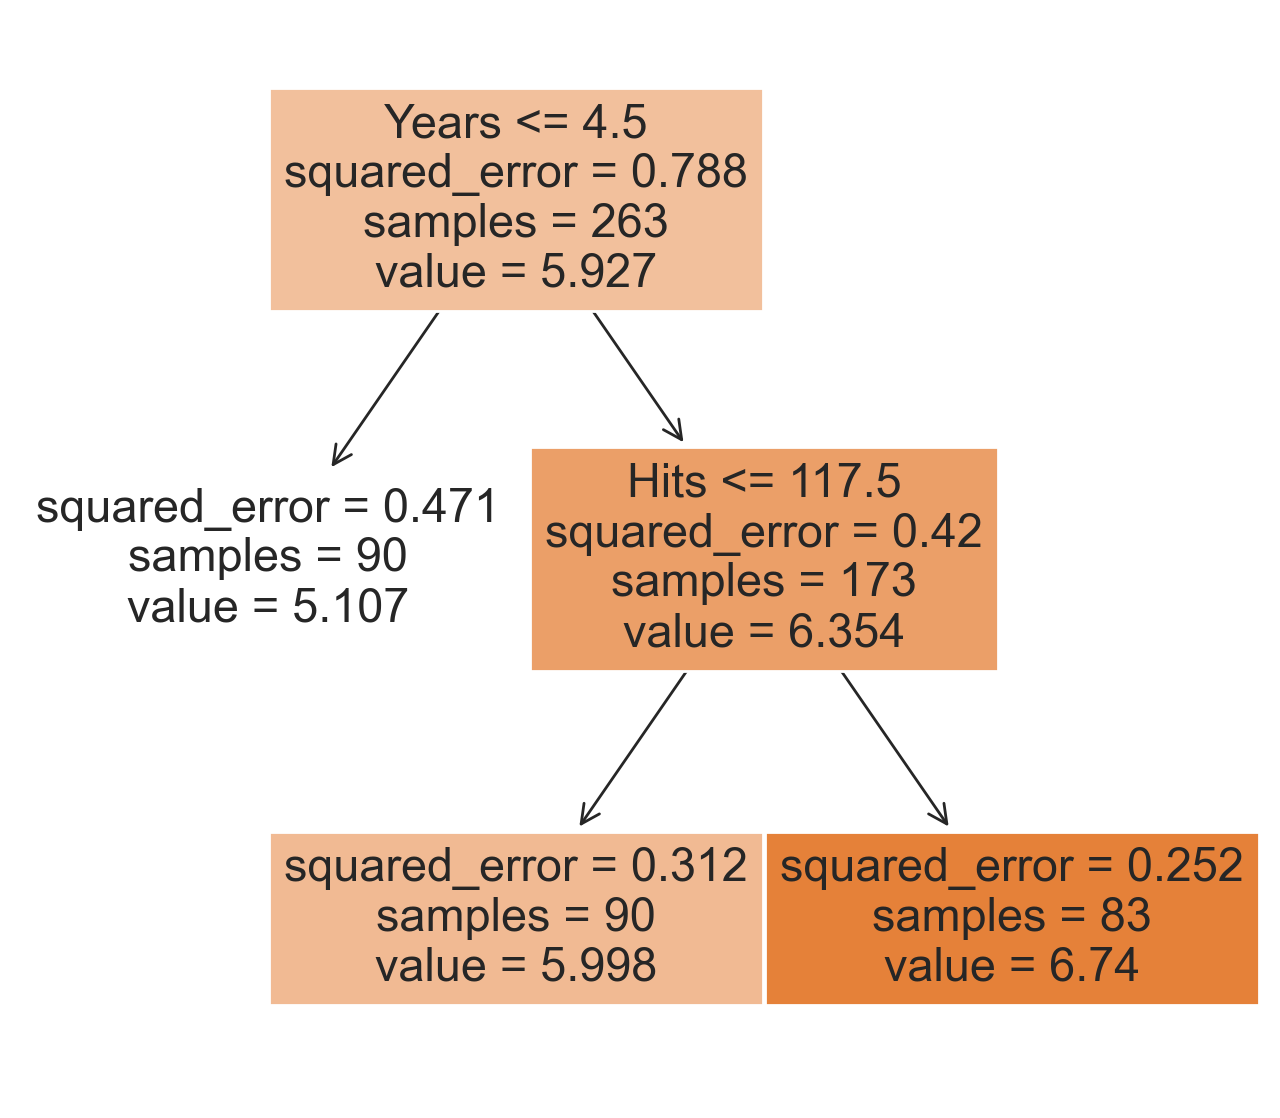

In [7]:
fig = plt.figure(figsize = (8,7))
tree.plot_tree(tree_reg1, feature_names = ['Years', 'Hits'], filled = True)
plt.show()

Plot features importance

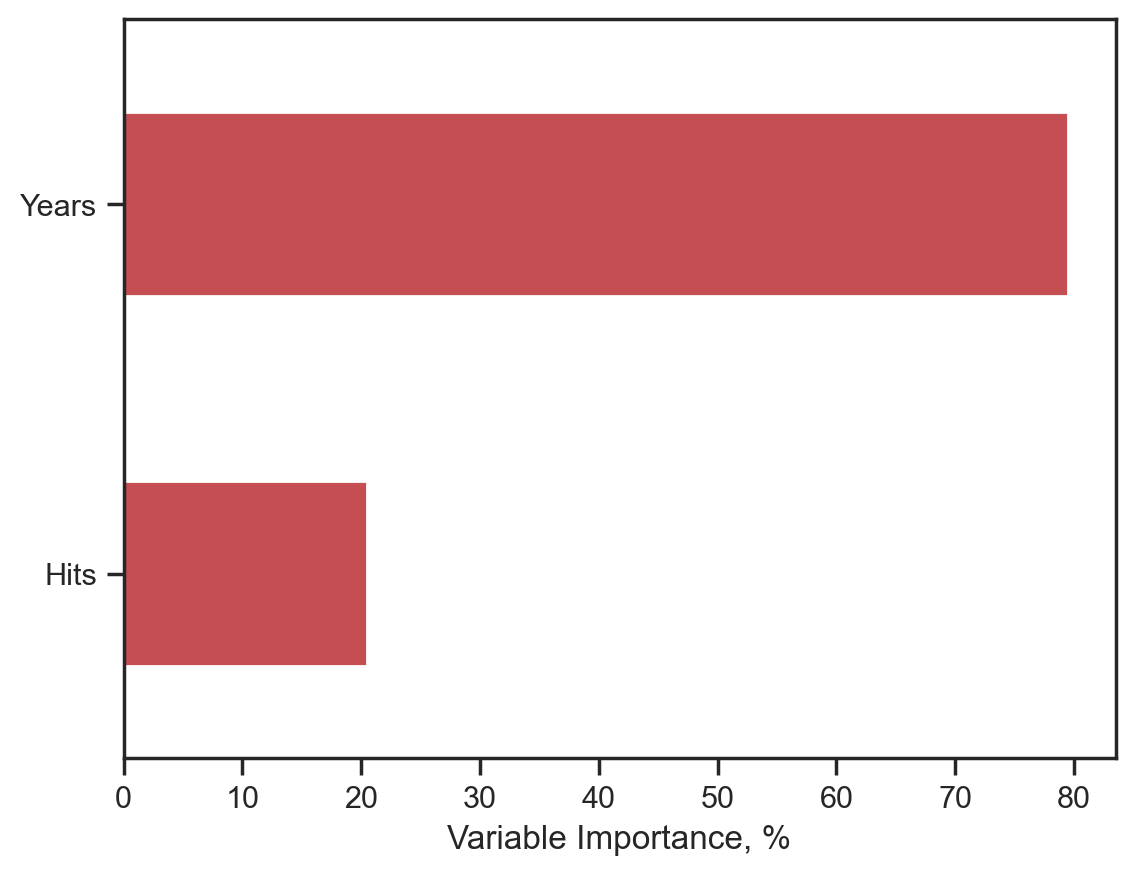

In [8]:
Importance = pd.DataFrame({'Importance':tree_reg1.feature_importances_*100}, index=['Years', 'Hits'])
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance, %')
plt.gca().legend_ = None
plt.show()

## 8.2 Classification Trees

Load `Heart` data

In [9]:
df_heart = pd.read_csv("../Data/Heart.csv", index_col=0).dropna()

In [10]:
df_heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [11]:
df_heart['ChestPain'] = pd.factorize(df_heart.ChestPain)[0]
df_heart['Thal'] = pd.factorize(df_heart.Thal)[0]

In [12]:
df_heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0,No
2,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1,Yes
3,67,1,1,120,229,0,2,129,1,2.6,2,2.0,2,Yes
4,37,1,2,130,250,0,0,187,0,3.5,3,0.0,1,No
5,41,0,3,130,204,0,2,172,0,1.4,1,0.0,1,No


Create variabels

In [13]:
X2 = df_heart.drop('AHD', axis=1)
y2 = pd.factorize(df_heart.AHD)[0]

Estimate a model

In [14]:
#| warning: false

tree_clf1 = DecisionTreeClassifier(max_depth = None, max_leaf_nodes = 6, max_features = 3, random_state = 1337)
tree_clf1.fit(X2, y2)
tree_clf1.score(X2, y2)

0.8013468013468014

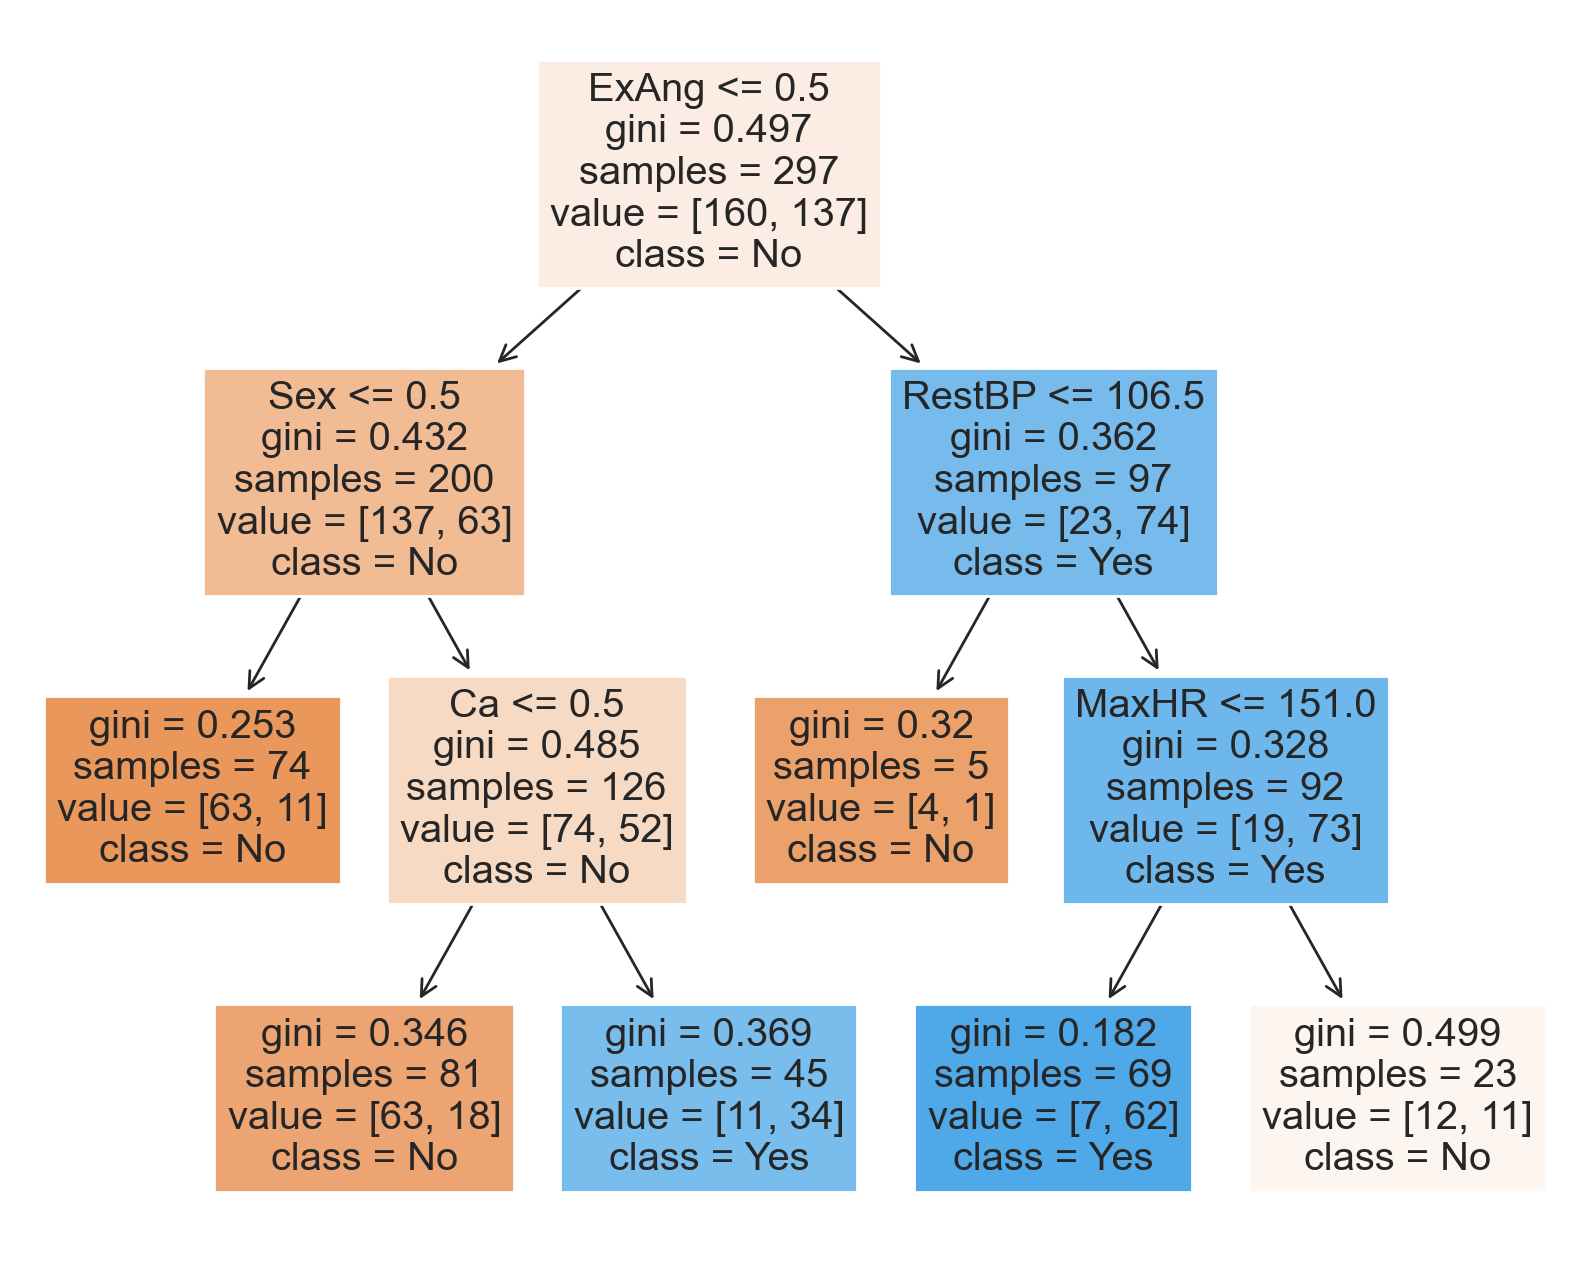

In [15]:
fig = plt.figure(figsize = (10,8))
tree.plot_tree(tree_clf1, feature_names = X2.columns, filled = True, class_names = ['No', 'Yes'])
plt.show()

## 8.3 Lab: Tree-Based Methods

### 8.3.1 Fitting Classification Trees

Load `Carseats` data

In [16]:
df_seats = pd.read_csv("../Data/Carseats.csv").drop('Unnamed: 0', axis=1)

In [17]:
df_seats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [18]:
df_seats['High'] = df_seats["Sales"].map(lambda x: 1 if x > 8 else 0)
df_seats['ShelveLoc'] = pd.factorize(df_seats['ShelveLoc'])[0]
df_seats['Urban'] = df_seats['Urban'].map({'No':0, 'Yes':1})
df_seats['US'] = df_seats['US'].map({'No':0, 'Yes':1})

In [19]:
df_seats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


Create train and test sets

In [20]:
X = df_seats.drop(['Sales', 'High'], axis=1)
y = df_seats['High']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1337)

Estimate Tree Classifier

In [21]:
tree_clf2 = DecisionTreeClassifier(max_depth = 6, random_state = 1337)
tree_clf2.fit(X, y)
tree_clf2.score(X, y)

0.9175

Plot graph

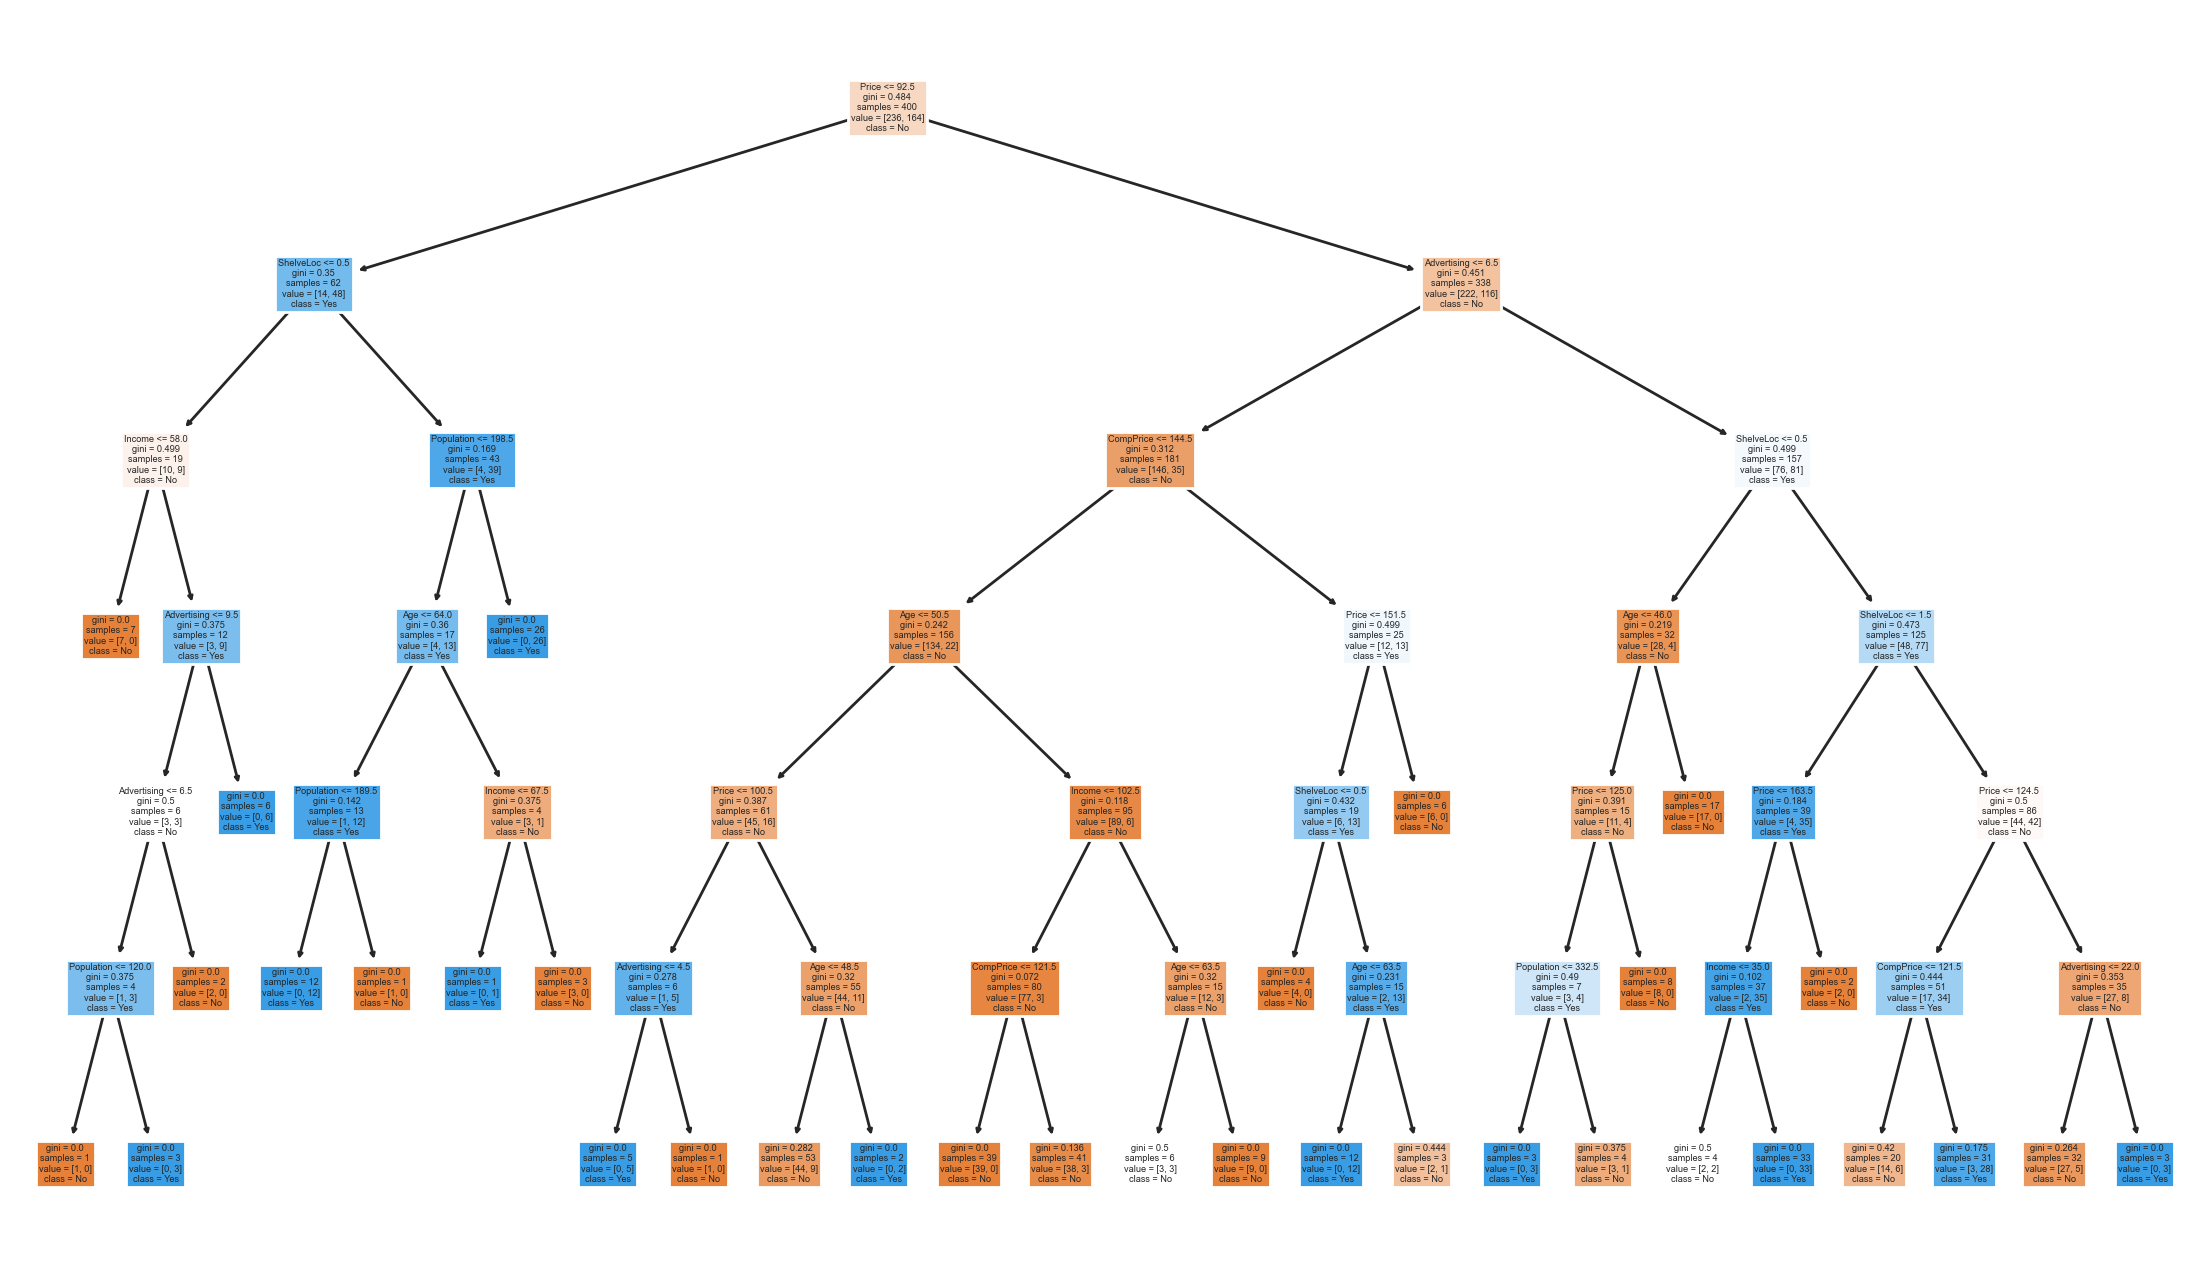

In [22]:
fig = plt.figure(figsize = (14,8))
tree.plot_tree(tree_clf2, feature_names = X.columns, filled = True, class_names = ['No', 'Yes'])
plt.show()

In [23]:
tree_clf3 = DecisionTreeClassifier(max_depth = 6, random_state = 1337)
tree_clf3.fit(X_train, y_train)
tree_clf3.score(X_test, y_test)

0.685

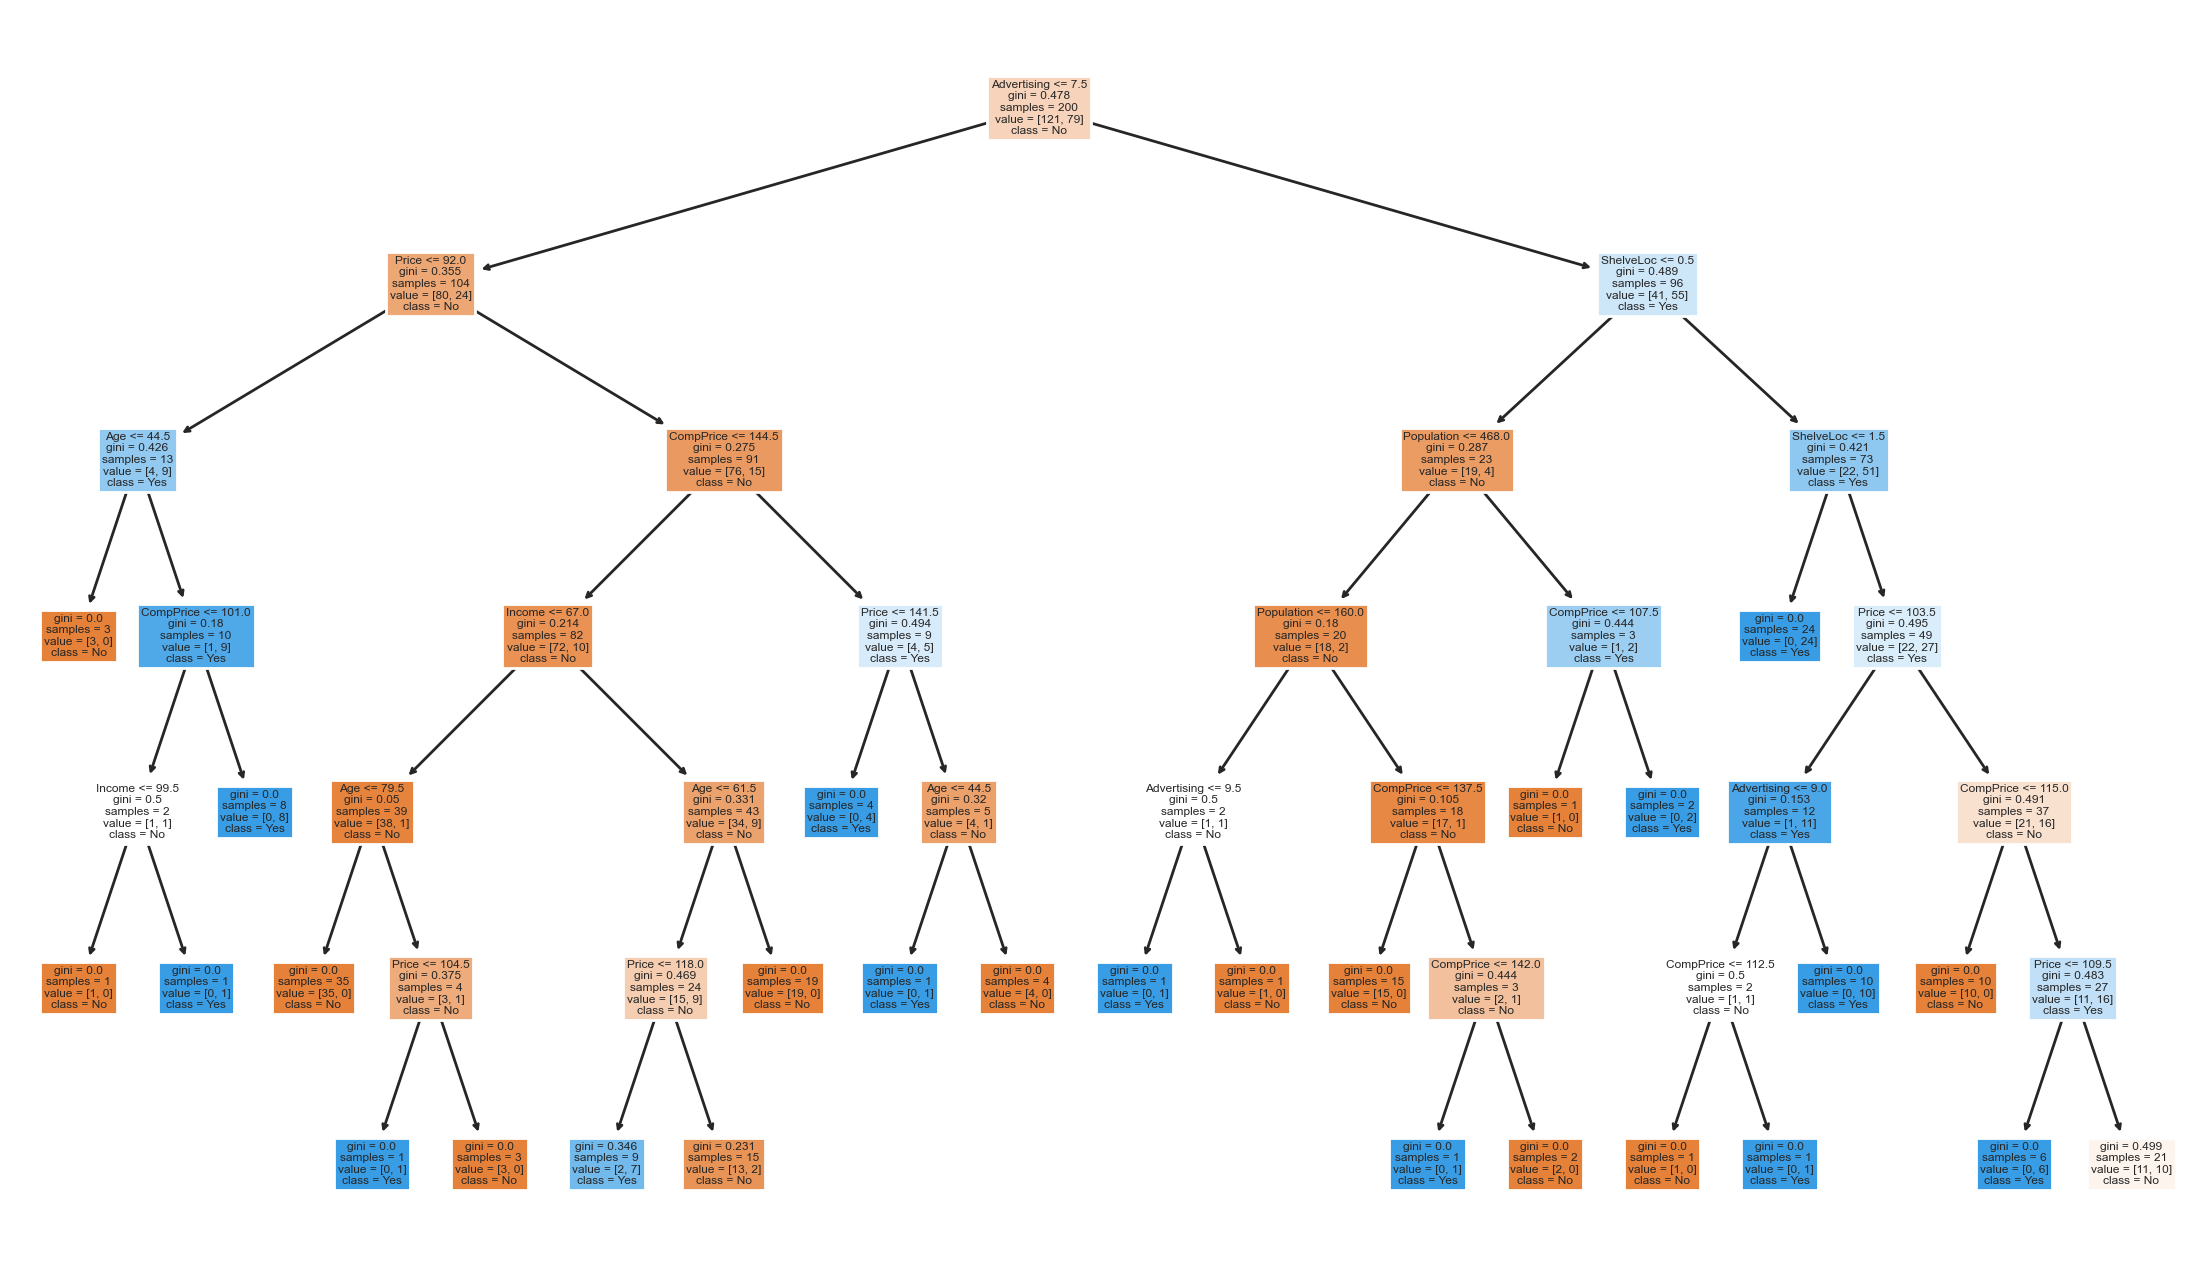

In [24]:
fig = plt.figure(figsize = (14,8))
tree.plot_tree(tree_clf3, feature_names = X.columns, filled = True, class_names = ['No', 'Yes'])
plt.show()

### 8.3.2 Fitting Regression Trees

Import `Boston` data

In [25]:
df_boston = pd.read_csv("../Data/Boston.csv")

In [26]:
df_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [27]:
X = df_boston.drop('medv', axis=1)
y = df_boston['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=0)

In [28]:
tree_reg2 = DecisionTreeRegressor(max_depth = 3)
tree_reg2.fit(X_train, y_train)
tree_reg2.score(X_test, y_test)

0.6567545227706458

In [29]:
pred = tree_reg2.predict(X_test)
mean_squared_error(y_test, pred)

26.02323085009745

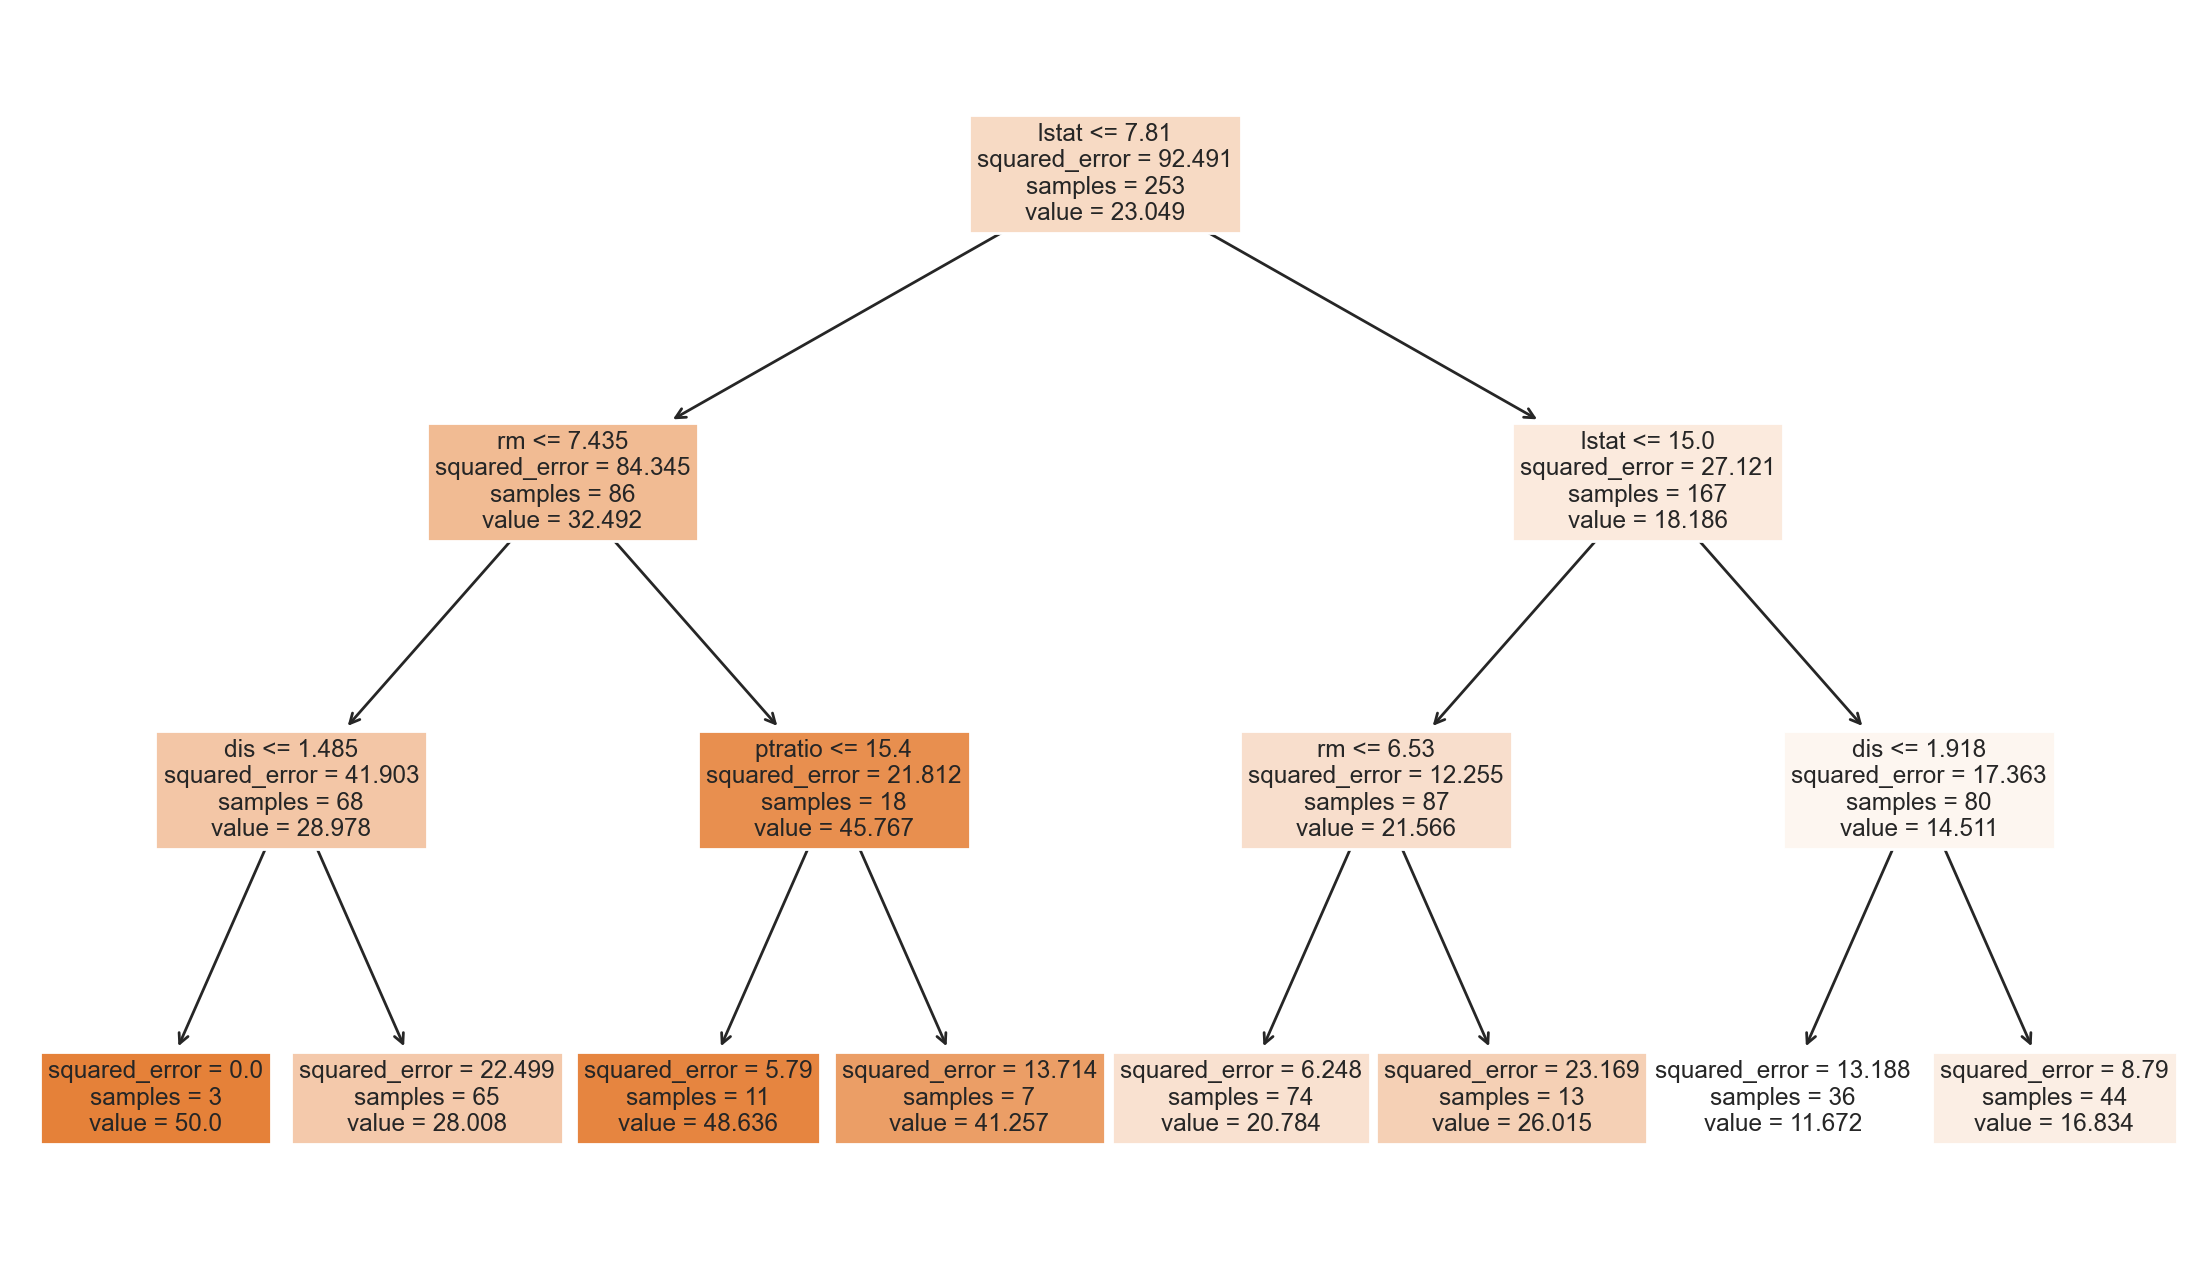

In [30]:
fig = plt.figure(figsize = (14,8))
tree.plot_tree(tree_reg2, feature_names = X.columns, filled = True)
plt.show()

### 8.3.3 Bagging and Random Forests

In [31]:
# bagging with p features

max_features = X.shape[1]
tree_reg3 = RandomForestRegressor(max_features = max_features, random_state = 1337)
tree_reg3.fit(X_train, y_train)
tree_reg3.score(X_test, y_test)

0.7843497913152723

In [32]:
pred = tree_reg3.predict(X_test)
mean_squared_error(y_test, pred)

16.349567687747037

In [33]:
# bagging with 6 features

tree_reg4 = RandomForestRegressor(max_features = 6, random_state = 1337)
tree_reg4.fit(X_train, y_train)
tree_reg4.score(X_test, y_test)

0.7942246602767749

In [34]:
pred = tree_reg4.predict(X_test)
mean_squared_error(y_test, pred)

15.600902339920951

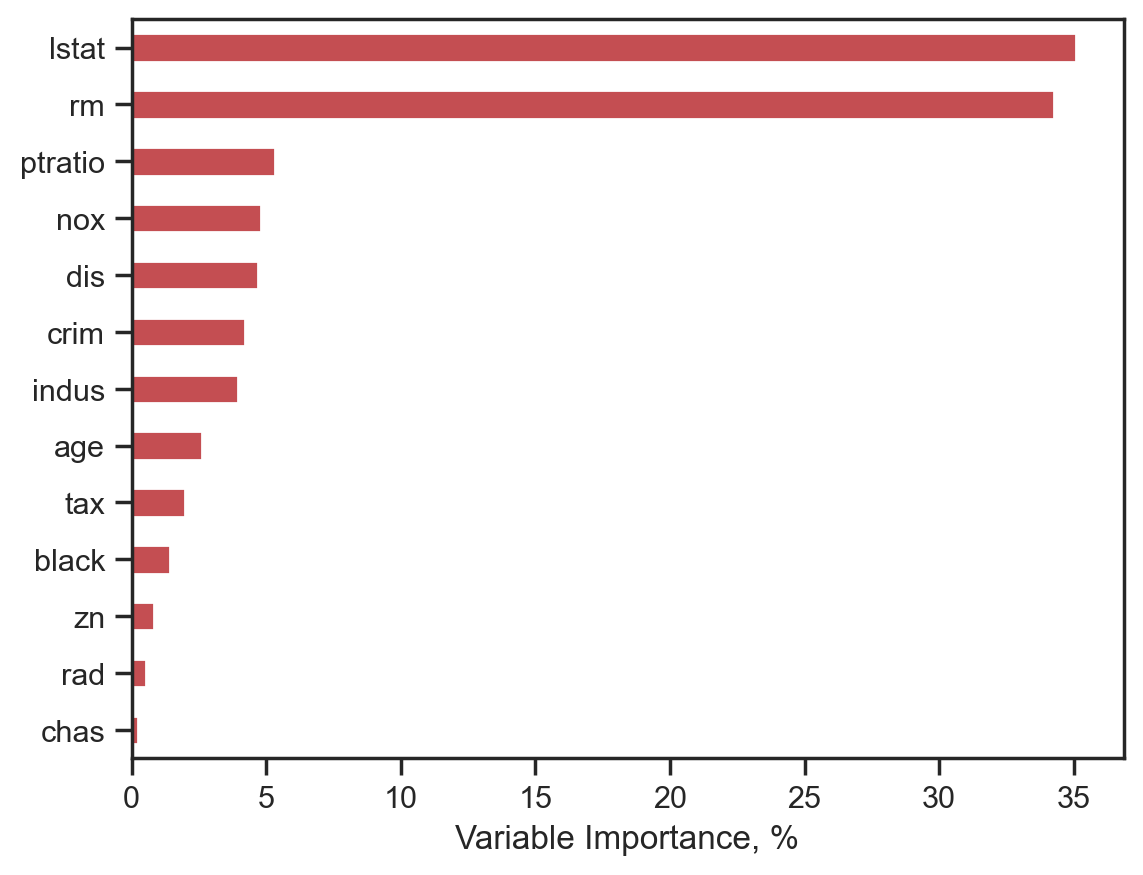

In [35]:
Importance = pd.DataFrame({'Importance':tree_reg4.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance, %')
plt.gca().legend_ = None
plt.show()

### 8.3.4 Boosting

In [36]:
tree_reg5 = GradientBoostingRegressor(n_estimators = 10000, learning_rate = 0.001, random_state = 1337)
tree_reg5.fit(X_train, y_train)
tree_reg5.score(X_test, y_test)

0.8007171120783761

In [37]:
mean_squared_error(y_test, tree_reg5.predict(X_test))

15.108675688079861

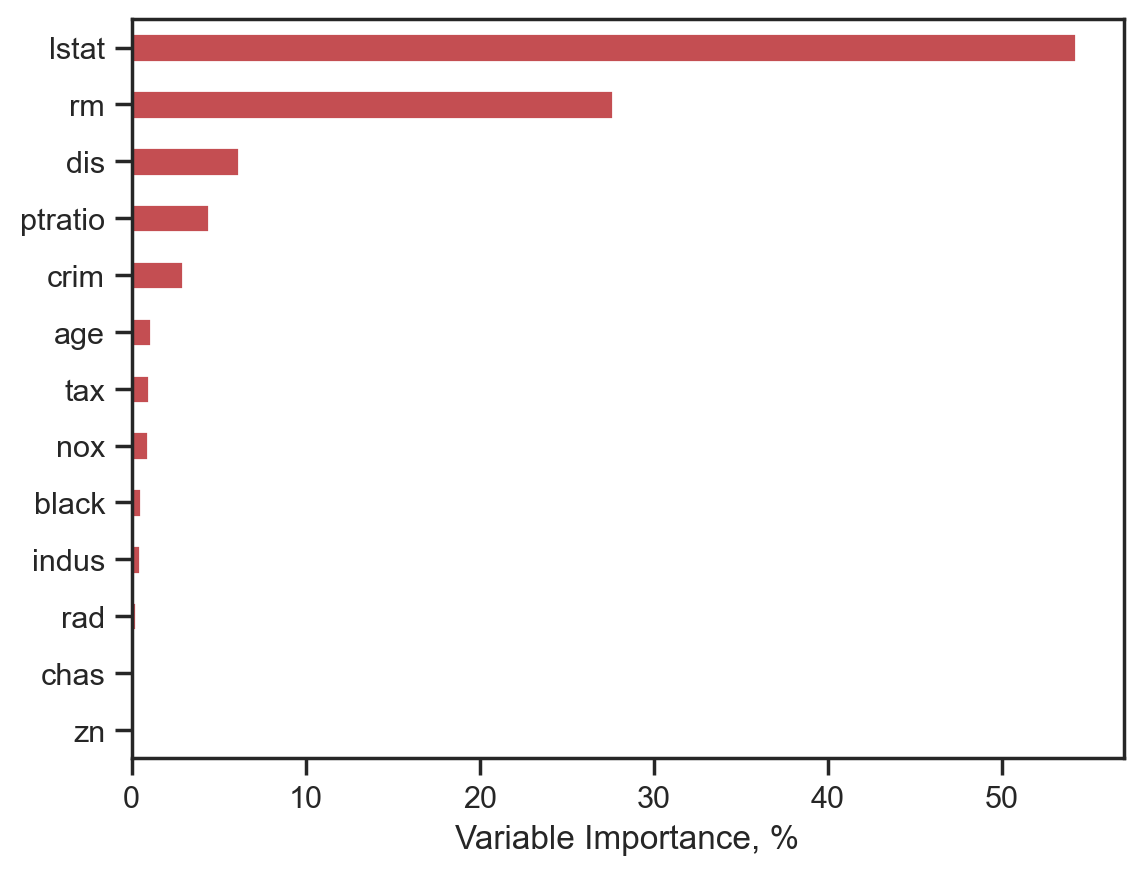

In [38]:
Importance = pd.DataFrame({'Importance':tree_reg5.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r')
plt.xlabel('Variable Importance, %')
plt.gca().legend_ = None
plt.show()

**End of Linear Tree-Based Methods practice code**